In [1]:
import pandas as pd
import csv
import re
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt
import multiprocessing


Фильтрация по имени класса

In [32]:
def filter_by_class_name(input_df: pd.DataFrame, name_class: str) -> pd.DataFrame:
    mask = (input_df.name_class == name_class)
    new_df = (input_df[mask])
    return new_df

Сортировка dataframe по заданному значению высоты или ширины изображений

if sort parameter = width => w_or_h = True, else w_or_h = False

In [18]:
def filter_by_size(input_df: pd.DataFrame, value: int, w_or_h: bool) -> pd.DataFrame:
    if w_or_h:
        mask = (input_df.image_width <= int(value))
    else:
        mask = (input_df.image_hight <= int(value))
    new_df = (input_df[mask])
    return new_df

формирование гистограммы для определённого цвета

Входные данные в формате кортежа или списка: (данные_о_цвете, имя_цвета{r, g, b})

In [4]:
def show_hist(color_and_name_color: list) -> None:
    col = color_and_name_color[0]
    name_color = color_and_name_color[1]

    if name_color == "r":
        plt.hist(col, color="red")
        plt.title("Histogram of red color", color="red")
    if name_color == "g":
        plt.hist(col, color="green")
        plt.title("Histogram of green color", color="green")
    if name_color == "b":
        plt.hist(col, color="blue")
        plt.title("Histogram of blue color", color="blue")
    plt.xlabel("Intensity")
    plt.ylabel("Number of pixels")
    plt.show()

Создание и вывод гистограммы по случайно выбранной картинке

Вывод выбранной фотографии(закоментирован так как возникают некоторые проблемы с выводом в Jupiter)

In [24]:
def create_histogram(input_df: pd.DataFrame, name_class: str) -> None:
    result = [[], [], []]
    abs_way_list = filter_by_class_name(input_df, name_class)[
        "the_absolute_way"].tolist()
    abs_way = str(abs_way_list[random.randint(0, len(abs_way_list) - 1)])
    image = cv2.imdecode(np.fromfile(
        abs_way, dtype=np.uint8), cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        result[-i+1] = histr
        plt.plot(histr, color=col)
        plt.xlim([0, 256])
    plt.show()
    return result

Считавание колонки под номером number_of_cell в файле с путём way_to_file

In [6]:
def read_csv(way_to_file: str, number_of_cell: int) -> list:
    read_list = []
    file = open(way_to_file, "r", encoding="utf-8")
    reader = csv.reader(file, delimiter="\t")
    for row in reader:
        if number_of_cell == 1:
            row_to_app = re.split(";", str(row))[number_of_cell]
        else:
            row_to_app = re.split(";", str(row))[number_of_cell][0:-2]
        read_list.append(row_to_app)
    return read_list

# Пункт 1-4.

Основная функция создания всего dataframe, а также выполнение сортировки и вывода гистограмм

In [49]:
list_abs_way = read_csv("dataset.csv", 1)
list_name_class = read_csv("dataset.csv", 2)
list_bin = ["num_point"]
list_image_width = ["image_width"]
list_image_hight = ["image_hight"]
list_image_depth = ["number_of_chanel"]
list_image_pix = ["number_of_pixels"]
for row in list_name_class:
    if row == "zebra":
        list_bin.append("0")
    if row == "bay_horse":
        list_bin.append("1")
for way in list_abs_way:
    try:
        image = cv2.imread(way)
        list_image_width.append(image.shape[1])
        list_image_hight.append(image.shape[0])
        list_image_depth.append(image.shape[2])
        list_image_pix.append(int(image.shape[0]) * int(image.shape[1]))
    except:
        pass
for i in range(1, len(list_abs_way)):
    try:
        list_abs_way[i] = os.path.abspath(list_abs_way[i])
    except:
        pass
list_abs_way[0] = "the_absolute_way"
df = pd.DataFrame(
    {
        list_name_class[0]: pd.array(list_name_class[1:]),
        list_abs_way[0]: pd.array(list_abs_way[1:]),
        list_bin[0]: pd.array(list_bin[1:]),
        list_image_width[0]: pd.array(list_image_width[1:]),
        list_image_hight[0]: pd.array(list_image_hight[1:]),
        list_image_depth[0]: pd.array(list_image_depth[1:]),
        list_image_pix[0]: pd.array(list_image_pix[1:])
    }
)
df = df.rename(columns={"Class": "name_class"})
list_name_class[0] = "name_class"
print(df)

     name_class                                   the_absolute_way num_point  \
0         zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
1     bay_horse  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         1   
2         zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
3     bay_horse  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         1   
4         zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
...         ...                                                ...       ...   
2095  bay_horse  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         1   
2096      zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
2097  bay_horse  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         1   
2098      zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
2099  bay_horse  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         1   

      image_width  image_hight  number_

# Пункт 6.

In [50]:
start = False
while not start:
    print("Input name class->", end='')
    input_nc = input()
    os.system('cls')
    if input_nc in list_name_class:
        start = True
        print(filter_by_class_name(df, input_nc))

Input name class->     name_class                                   the_absolute_way num_point  \
0         zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
2         zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
4         zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
6         zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
8         zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
...         ...                                                ...       ...   
2090      zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
2092      zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
2094      zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
2096      zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
2098      zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   

      image_width  im

# Пункт 7.

In [51]:
print("input width->", end='')
input_w = input()
print("input hight->", end='')
input_h = input()
os.system('cls')
first_sort_df = filter_by_size(filter_by_class_name(
    df, input_nc), input_w, True)
print(filter_by_size(first_sort_df, input_h, False))

input width->input hight->     name_class                                   the_absolute_way num_point  \
14        zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
26        zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
28        zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
34        zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
40        zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
...         ...                                                ...       ...   
2076      zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
2078      zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
2084      zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
2090      zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   
2092      zebra  c:\Users\miste\OneDrive\Desktop\ВАЖНОЕ\учёба\д...         0   

      image_w

# Пункт 8.

In [52]:
print(df.groupby(['name_class']).number_of_pixels.max())
print('\n\n')
print(df.groupby(['name_class']).number_of_pixels.min())
print('\n\n')
print(df.groupby(['name_class']).number_of_pixels.mean())

name_class
bay_horse    274480
zebra        153600
Name: number_of_pixels, dtype: Int64



name_class
bay_horse    58560
zebra        51200
Name: number_of_pixels, dtype: Int64



name_class
bay_horse    127805.180952
zebra        136849.066667
Name: number_of_pixels, dtype: Float64


# Пункт 9.

count        1049.0
mean     408.517636
std       81.839456
min           183.0
25%           376.0
50%           427.0
75%           480.0
max           480.0
Name: image_width, dtype: Float64
count        1049.0
mean     313.624404
std       16.545796
min           226.0
25%           320.0
50%           320.0
75%           320.0
max           360.0
Name: image_hight, dtype: Float64
count    1049.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: number_of_chanel, dtype: Float64


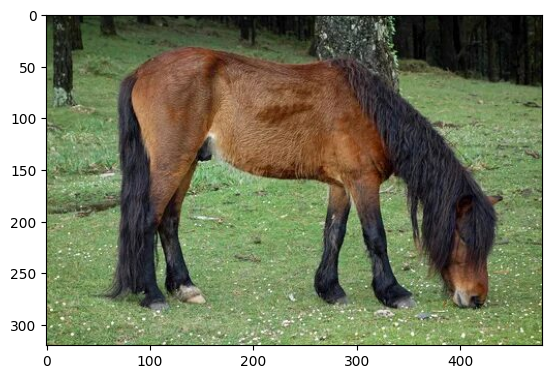

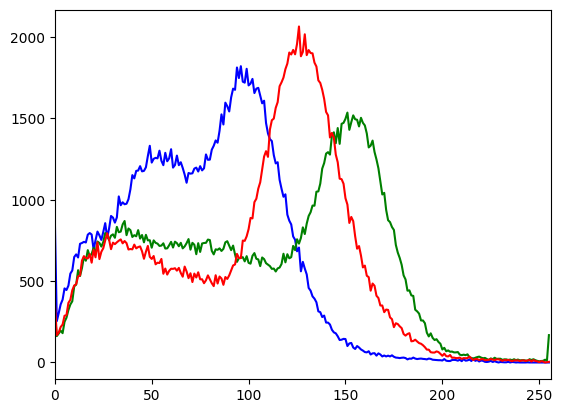

In [25]:
print(first_sort_df["image_width"].describe())
print(first_sort_df["image_hight"].describe())
print(first_sort_df["number_of_chanel"].describe())
list_of_color = create_histogram(df, input_nc)

# Пункт 10.

!MULTIPROCESSING НЕ РАБОТАЕТ В ДАННОМ ФОРМАТЕ, ОДНАКО ЕСЛИ ЗАПУСТИТЬ В ПИТОН ФАЙЛЕ, ТО СДЕЛАЕТ ВСЁ БЫСТРО И КРАСИВО!

In [15]:
list_arg = [
    (list_of_color[0], 'r'),
    (list_of_color[1], 'g'),
    (list_of_color[2], 'b')
]

with multiprocessing.Pool(multiprocessing.cpu_count()) as p:
    p.map(show_hist, list_arg)